Web API

Write a python program to do the following:
    
    1. Get one month of historical weather data (i.e. temperatures). In specific: one month of data for 5 distinct locations.
    2. You can use any WEB service available for free (tested site: http://api.wunderground.com/api) make sure to get an API-KEY if required.
    3. Build a data summary table that summaries max, min, and mean values of the temperature during that month for each location selected.
    4. Plot a graph that shows your data for the selected locations (to be used as comparative tool).

The only libraries to use for this exercise are: matplotlib, requests and python built-in data types.


Summary of temperature in 5 cities

City                				Mean	Minimum	Maximum
Africa/Johannesburg 				59.42	51.21	67.37
Europe/London       				41.99	30.27	56.68
Europe/Paris        				42.75	31.54	54.24
America/New_York    				57.89	45.49	73.27
Europe/Brussels     				41.86	32.41	52.81


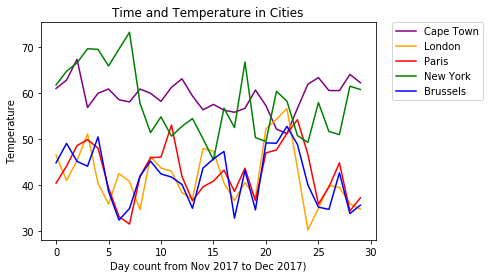

In [27]:
##### Web API

#import libraries
import matplotlib.pyplot as plt
import requests

#create empty list to store values
time_list = []
timezone_list = []
full_temperature_list = []
temperature_list_full = []
min_list = []
max_list = []
mean_list = []
agg_timezone_list = []

#key to access api 
key = "066b0b91f5fdb0ade6555af1e4146dd9"
        
#Cities and their coordinates
#Cape Town, South Africa -33.56 S 18.25 E
#London, England  51.30 N 00.10 W
#Paris, France 48.52 N 2.20 E
#New York = 32.8267 -82.4233
#Brussels, Belgium 50.52 N 4.22 E
latitude = ["-33.56","51.30","48.52","32.8267","50.52"]
longtitude = ["18.25","00.10","02.20","-82.4233","4.22"]
   
for i in range(len(latitude)):
    iterable_time = 1509494400
    temperature_list = []
    for j in range(0,30):
        url_time = str(iterable_time)
        url = "https://api.darksky.net/forecast/" + key + "/" + latitude[i] + "," + longtitude[i] + "," + url_time 
    # Get the response from the API endpoint.
        response = requests.get(url)
        data = response.json()
    # Scraping timezone, temperatue from the api
        timezone = data['timezone']
        temperature = data['currently']['temperature']
        tem_dict = {"timezone":timezone,"temperature":temperature,"time":iterable_time}
        time_list.append(iterable_time)
        timezone_list.append(timezone)
        temperature_list.append(temperature)
        temperature_list_full.append(temperature)
        full_temperature_list.append(tem_dict)
        iterable_time = iterable_time + 86400
    # Aggregating temperature values to be displayed in summary table
    min_temperature = min(temperature_list)
    max_temperature = max(temperature_list)
    mean_temperature = sum(temperature_list)/len((temperature_list))
    min_list.append(min_temperature)
    max_list.append(max_temperature)
    mean_list.append(mean_temperature)
    agg_timezone_list.append(timezone)
    
#print summary table
print("Summary of temperature in Cities\n")
print("City"+(" " * (20-4))+"\t\t\t\tMean\tMinimum\tMaximum")
for i in range(len(agg_timezone_list)):
    print(agg_timezone_list[i] + (" " * (20-len(agg_timezone_list[i]))) + "\t\t\t\t" + str(round(mean_list[i],2)) + "\t" + str(round(min_list[i],2)) + "\t" + str(round(max_list[i],2)))

#plot graph showing temperature of cities
plt.plot(range(30), temperature_list_full[0:30], color='purple')
plt.plot(range(30), temperature_list_full[30:60], color='orange')
plt.plot(range(30), temperature_list_full[60:90], color='red')
plt.plot(range(30), temperature_list_full[90:120], color='green')
plt.plot(range(30), temperature_list_full[120:150], color='blue')
plt.legend(['Cape Town','London','Paris','New York','Brussels'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # anchor ledgend so it doesn’t cover graph
plt.xlabel('Day count from Nov 2017 to Dec 2017)')
plt.ylabel('Temperature')
plt.title('Time and Temperature in Cities')
plt.show()


Web Scraping/Crawling 

Scrape the Boone County site for the data set which has Last Name First Name Age Total Cases Total Bail
    
Solution as follows:

    - Using BeautifulSoap.
    - 2 versions of your code - one sequential and one utilizing threading.
    - Comparisons for both versions execution times.
    - Plot showing the top 10 crime types (show crime description and occurrence percentage)
    

In [29]:
#Web Scraping

# Import libraries
import timeit
import matplotlib
import requests
from threading import Thread
import time
import urllib.request as urllib2
from bs4 import BeautifulSoup
import time

def sequential_code(base_url,inmate_url_list):
    for i in range(len(inmate_url_list)):
        x = (i+i)/2
        url_to_parse = base_url + inmate_url_list[i]
        url_to_parse = url_to_parse.replace("&hover_redir=&height=600&width=950","")
        page = urllib2.urlopen(url_to_parse)
        soup = BeautifulSoup(page, 'html.parser')
        name = soup.findAll('div', attrs={'id': 'inmateName'})
        full_name = name[0].getText()
        first_name = full_name[(full_name.find(" ")+1):(full_name.find(" ",(full_name.find(" ")+1)))]
        last_name = full_name[0:full_name.find(',')]
        age = soup.findAll('td', attrs={'class': 'two td_left'})
        age_value = age[6].getText()
        cases_list = []
        cases = soup.findAll('td', attrs={'data-th': 'CASE #'})
        for i in range(len(cases)):
            cases_list.append(cases[i].getText())
        bail_list = []
        bail = soup.findAll('td', attrs={'data-th': 'BAIL'})
        for i in range(len(bail)):
            temp_bail = (bail[i].getText()).replace(",","")
            temp_bail = temp_bail.replace(" ","")
            if temp_bail != '\n':
                bail_list.append(float(temp_bail))
        inmate_dict = {"First Name": first_name,"Last Name": last_name,"Age":age_value,"Cases":len(set(cases_list)),"Total bail":sum(bail_list)}
        sequential_code_output.append(inmate_dict)
        charge_type_value = soup.findAll('td', attrs={'data-th': 'CHARGE DESCRIPTION'})
        for i in range(len(charge_type_value)):
            charge_type.append((charge_type_value[i]).getText())
        
def threaded_code(base_url,inmate_url_list):
    for i in range(len(inmate_url_list)):
        x = (i+i)/2
        url_to_parse = base_url + inmate_url_list[i]
        url_to_parse = url_to_parse.replace("&hover_redir=&height=600&width=950","")
        page = urllib2.urlopen(url_to_parse)
        soup = BeautifulSoup(page, 'html.parser')
        name = soup.findAll('div', attrs={'id': 'inmateName'})
        full_name = name[0].getText()
        first_name = full_name[(full_name.find(" ")+1):(full_name.find(" ",(full_name.find(" ")+1)))]
        last_name = full_name[0:full_name.find(',')]
        age = soup.findAll('td', attrs={'class': 'two td_left'})
        age_value = age[6].getText()
        cases_list = []
        cases = soup.findAll('td', attrs={'data-th': 'CASE #'})
        for i in range(len(cases)):
            cases_list.append(cases[i].getText())
        bail_list = []
        bail = soup.findAll('td', attrs={'data-th': 'BAIL'})
        for i in range(len(bail)):
            temp_bail = (bail[i].getText()).replace(",","")
            temp_bail = temp_bail.replace(" ","")
            if temp_bail != '\n':
                bail_list.append(float(temp_bail))
        inmate_dict = {"First Name": first_name,"Last Name": last_name,"Age":age_value,"Cases":len(set(cases_list)),"Total bail":sum(bail_list)}
        threaded_code_output.append(inmate_dict)
        threaded_charge_type_value = soup.findAll('td', attrs={'data-th': 'CHARGE DESCRIPTION'})
        for i in range(len(threaded_charge_type_value)):
            threaded_charge_type.append((threaded_charge_type_value[i]).getText())
        print("Threaded time:", time.time() -start)
            
url = 'https://report.boonecountymo.org/mrcjava/servlet/SH01_MP.I00290s'
page = urllib2.urlopen(url)
# Parse the html using beautiful soup and store in variable soup
soup = BeautifulSoup(page, 'html.parser')
inmate_url = soup.findAll('a', attrs={'class': '_lookup btn btn-primary'})
charge_type = []
sequential_code_output = []
inmate_url_list = []
for i in range(len(inmate_url)):
    inmate_url_list.append(inmate_url[i]['href'])
base_url = 'https://report.boonecountymo.org/mrcjava/servlet/'

sequential_time = timeit.timeit(lambda n = base_url:sequential_code(n,inmate_url_list),number = 1)
print("Sequential Code run time:",sequential_time)    

threaded_charge_type = []
threaded_code_output = []

start = time.time()
t1 = Thread(target=threaded_code,args=(base_url,inmate_url_list[:int(len(inmate_url_list)/2)]))
t2 = Thread(target=threaded_code,args=(base_url,inmate_url_list[int(len(inmate_url_list)/2):]))
t1.start()
t2.start()

Sequential Code run time: 31.081457244000376
Threaded time: 0.7391068935394287
Threaded time: 0.792306661605835
Threaded time: 1.5607781410217285
Threaded time: 1.61263108253479
Threaded time: 2.1693899631500244
Threaded time: 2.2308688163757324
Threaded time:Threaded time:  2.824411153793335
2.830432176589966
Threaded time: 3.623224973678589
Threaded time: 3.662970781326294
Threaded time: 4.231673955917358
Threaded time: 4.278559446334839
Threaded time: 4.8318071365356445
Threaded time: 4.947715520858765
Threaded time:Threaded time: 5.688421726226807
 5.671111822128296
Threaded time: 6.280004501342773
Threaded time: 6.332933187484741
Threaded time: 6.8907976150512695
Threaded time: 6.93367862701416
Threaded time:Threaded time: 7.586686372756958
 7.606815338134766
Threaded time:Threaded time: 8.243298053741455
 8.247316837310791
Threaded time:Threaded time: 8.984954595565796 9.008936882019043

Threaded time: 9.774714469909668
Threaded time: 9.838911533355713
Threaded time: 10.377107620